In [1]:
import pandas as pd 

In [2]:
chprix2020=pd.read_csv('data/chprix/chprix2020.csv')
chprix2021=pd.read_csv('data/chprix/chprix2021.csv')
chprix2022=pd.read_csv('data/chprix/chprix2022.csv')
chprix2023=pd.read_csv('data/chprix/CHprix2023.csv')

In [3]:
def extract_first_part(date_range):
    return date_range.split(' - ')[0]

In [4]:
chprix2022

,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,BZN|CH
0,01.01.2022 00:00 - 01.01.2022 01:00,119.97,EUR,NaN
1,01.01.2022 01:00 - 01.01.2022 02:00,101.54,EUR,NaN
2,01.01.2022 02:00 - 01.01.2022 03:00,52.13,EUR,NaN
3,01.01.2022 03:00 - 01.01.2022 04:00,20.78,EUR,NaN
4,01.01.2022 04:00 - 01.01.2022 05:00,15.66,EUR,NaN
...,...,...,...,...
8756,31.12.2022 19:00 - 31.12.2022 20:00,4.41,EUR,NaN
8757,31.12.2022 20:00 - 31.12.2022 21:00,1.75,EUR,NaN
8758,31.12.2022 21:00 - 31.12.2022 22:00,0.41,EUR,NaN
8759,31.12.2022 22:00 - 31.12.2022 23:00,0.07,EUR,NaN


In [5]:
def prepare_dataframe_with_datetime(df):
    
    # Apply the function to the relevant column
    df['date'] = df['MTU (CET/CEST)'].apply(extract_first_part)
    df.drop([ 'Currency', 'BZN|CH','MTU (CET/CEST)'], axis=1, inplace=True)
    df.rename(columns={'Day-ahead Price [EUR/MWh]':'price'}, inplace=True)
    # Définir la séquence de dates comme l'index du DataFrame
    df.set_index('date', inplace=True)
    
    # Convertir l'index en datetime (cette étape peut être redondante car l'index est déjà en datetime)
    df.index = pd.to_datetime(df.index,dayfirst=True)
    df = df[~df.index.duplicated()]
    
    return df

In [6]:
chprix2020=prepare_dataframe_with_datetime(chprix2020)
chprix2021=prepare_dataframe_with_datetime(chprix2021)
chprix2022=prepare_dataframe_with_datetime(chprix2022)
chprix2023=prepare_dataframe_with_datetime(chprix2023)


In [7]:
chprix2022

,price
date,
2022-01-01 00:00:00,119.97
2022-01-01 01:00:00,101.54
2022-01-01 02:00:00,52.13
2022-01-01 03:00:00,20.78
2022-01-01 04:00:00,15.66
...,...
2022-12-31 19:00:00,4.41
2022-12-31 20:00:00,1.75
2022-12-31 21:00:00,0.41


In [8]:
chprix=pd.concat([chprix2020, chprix2021,chprix2022, chprix2023],axis=0)
# Calculate the moving average (e.g., 30-day moving average)
chprix['Moving_Avg'] = chprix['price'].rolling(window=30).mean()

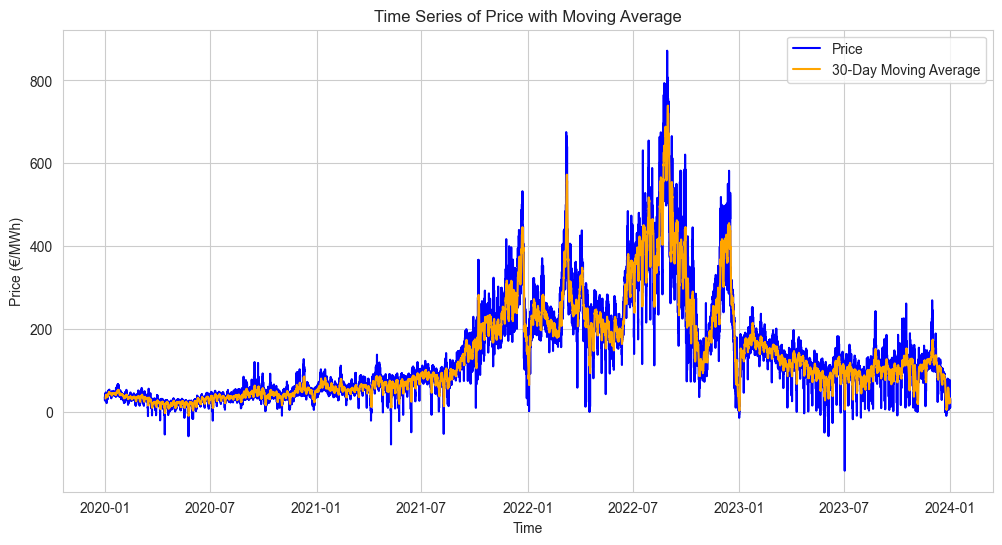

In [9]:
import  matplotlib.pyplot as plt
# Plotting the time series and the moving average
plt.figure(figsize=(12, 6))
plt.plot(chprix.index, chprix['price'], label='Price', color='blue')
plt.plot(chprix.index, chprix['Moving_Avg'], label='30-Day Moving Average', color='orange')
plt.xlabel('Time')
plt.ylabel('Price (€/MWh)')
plt.title('Time Series of Price with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

Voici une analyse de la série temporelle des prix de l'électricité en Suisse basée sur le graphique :

1. **Tendance générale** :
   - De 2020 à début 2021, les prix restent relativement bas et stables, avec des fluctuations mineures.
   - À partir de mi-2021, une tendance à la hausse notable est observée, culminant avec des augmentations de prix significatives vers la fin de 2022.
   - Après le pic, les prix commencent à diminuer mais restent volatils.

2. **Volatilité des prix** :
   - Le graphique montre une forte volatilité, surtout à partir de mi-2021, indiquant des conditions de marché instables ou des facteurs externes influençant les prix.
   - Cette volatilité peut être due à des changements saisonniers de la demande, des perturbations de l'offre ou des modifications réglementaires.

3. **Facteurs influents possibles** :
   - **Offre et demande du marché** : Une demande accrue ou une offre réduite (par exemple, en raison de maintenance ou de pannes imprévues) peuvent entraîner une hausse des prix.
   - **Prix des combustibles** : La hausse des prix des combustibles, en particulier du gaz naturel, peut faire grimper les prix de l'électricité, car les centrales à gaz déterminent souvent le prix marginal dans de nombreux marchés.
   - **Changements politiques et réglementaires** : L'introduction de nouvelles réglementations, taxes ou subventions peut impacter les prix.
   - **Conditions météorologiques** : Les conditions météorologiques sévères peuvent affecter à la fois l'offre et la demande, entraînant des pics de prix.

4. **Impact des événements mondiaux** :
   - Le pic des prix autour de la fin 2021 et 2022 peut être attribué aux perturbations du marché mondial de l'énergie, possiblement dues à des tensions géopolitiques, des changements dans les chaînes d'approvisionnement internationales de combustibles ou aux impacts économiques de la pandémie de COVID-19.

5. **Moyenne mobile** :
   - La ligne orange, représentant la moyenne mobile sur 30 jours, lisse les fluctuations à court terme, offrant une vue plus claire de la tendance sous-jacente.
   - La moyenne mobile met également en évidence la tendance générale à la hausse à partir de mi-2021 et la stabilisation ultérieure après le pic.

6. **Schémas saisonniers** :
   - Il pourrait y avoir des schémas saisonniers évidents dans les données, avec des prix atteignant des sommets à certaines périodes (par exemple, les mois d'hiver en raison de la demande accrue de chauffage).

7. **Dynamique du marché** :
   - Les données indiquent un marché très réactif où les prix s'ajustent rapidement aux conditions changeantes, ce qui peut être observé dans les pics et les baisses rapides des prix.

### Conclusion
Les prix de l'électricité en Suisse de 2020 à 2024 montrent une volatilité significative et une tendance générale à la hausse, particulièrement prononcée de mi-2021 à fin 2022. Ce comportement reflète probablement une combinaison de dynamiques locales du marché, d'influences du marché énergétique mondial et d'événements externes impactant l'offre et la demande. Comprendre ces tendances est crucial pour les parties prenantes, y compris les décideurs politiques, les entreprises énergétiques et les consommateurs, afin de prendre des décisions éclairées.

In [10]:
chprix.describe()

,price,Moving_Avg
count,35060.000000,34915.000000
mean,134.454585,134.694537
std,120.615049,117.517496
min,-142.880000,-10.148667
25%,46.140000,48.118833
50%,95.130000,95.043667
75%,187.582500,190.353667
max,871.610000,739.002667


In [11]:
# Fonction pour assigner les numéros aux trimestres
def assign_quarter(month):
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4
    


# Convertir l'index en série et appliquer la fonction
chprix['Quarter'] = chprix.index.to_series().apply(lambda x: assign_quarter(x.month))

# Créer une colonne 'Month' qui prend juste le mois
chprix['Month'] = chprix.index.month

chprix['Hour'] = chprix.index.hour+1

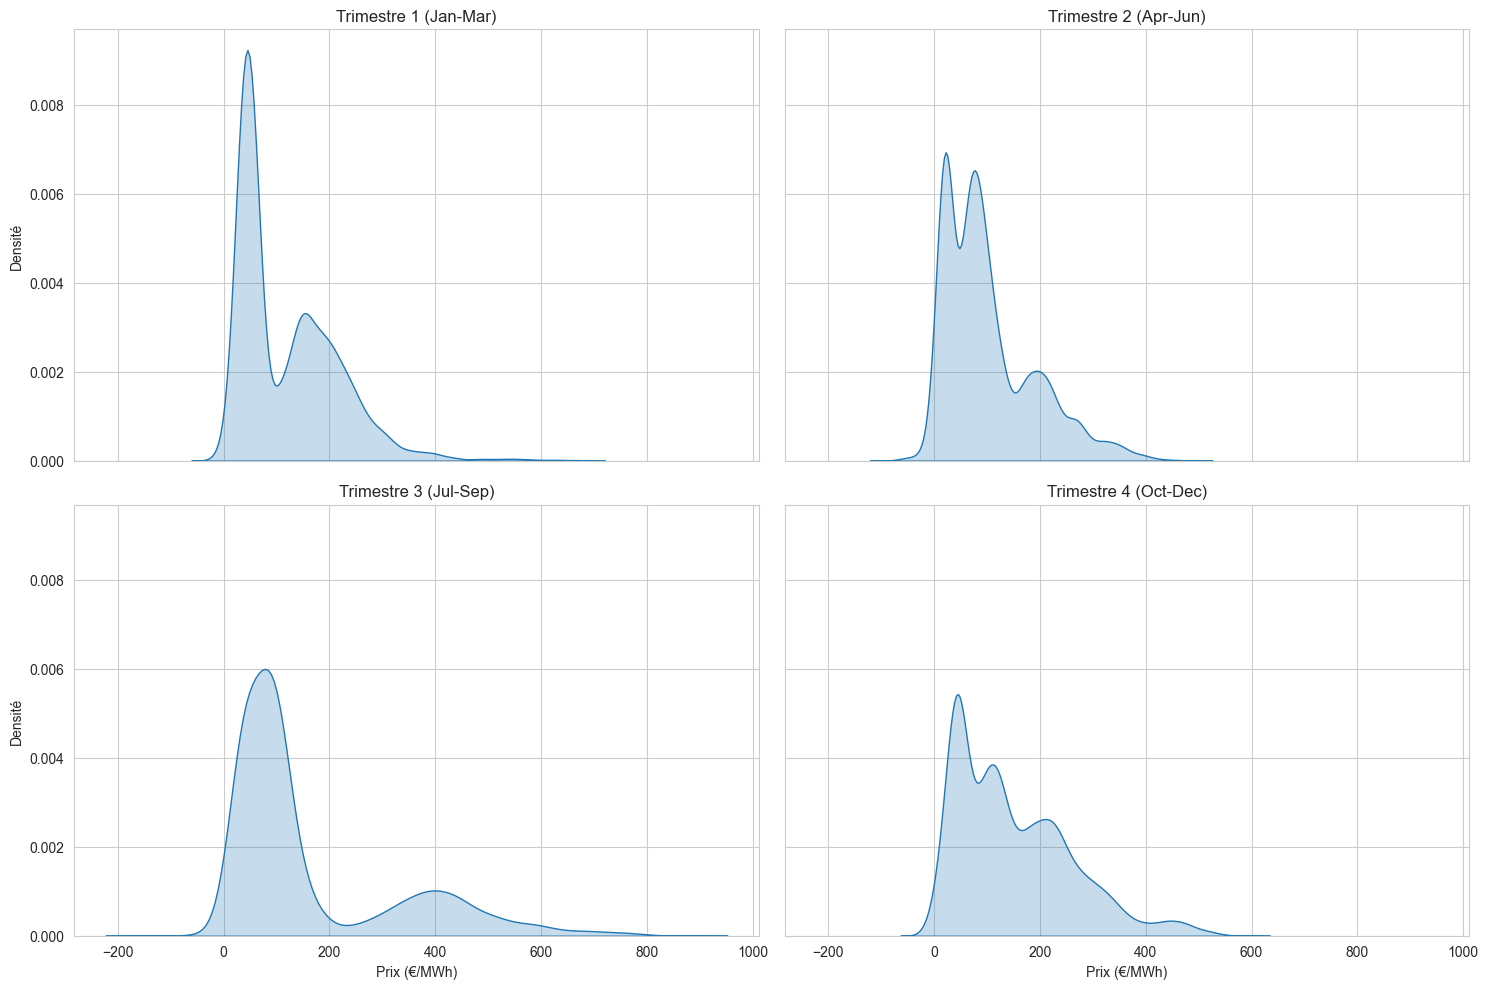

In [12]:
import seaborn as sns
# Tracer des graphiques de densité séparés pour chaque trimestre
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
quarters = [1, 2, 3, 4]
titles = ['Trimestre 1 (Jan-Mar)', 'Trimestre 2 (Apr-Jun)', 'Trimestre 3 (Jul-Sep)', 'Trimestre 4 (Oct-Dec)']

for i, ax in enumerate(axs.flatten()):
    sns.kdeplot(chprix[chprix['Quarter'] == quarters[i]]['price'], fill=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Prix (€/MWh)')
    ax.set_ylabel('Densité')

plt.tight_layout()
plt.show()

### Analyse des Graphiques de Densité par Trimestre

Les graphiques de densité montrent la distribution des prix de l'électricité en Suisse pour chaque trimestre. Voici quelques observations et conclusions possibles :

1. **Trimestre 1 (Jan-Mar)** :
   - La densité montre un pic élevé autour de 0, ce qui indique que les prix sont souvent bas ou négatifs.
   - Il y a une distribution avec des prix allant jusqu'à environ 100 €/MWh.

2. **Trimestre 2 (Apr-Jun)** :
   - Un profil similaire au Trimestre 1, avec un pic autour de 0 €/MWh, mais la distribution semble légèrement plus étendue.
   - La variabilité des prix est visible, avec des prix atteignant environ 200 €/MWh.

3. **Trimestre 3 (Jul-Sep)** :
   - Les prix montrent une distribution bimodale avec un pic principal autour de 0 €/MWh et un second autour de 100-200 €/MWh.
   - Les prix peuvent atteindre jusqu'à environ 600 €/MWh, indiquant une volatilité plus élevée pendant ces mois.

4. **Trimestre 4 (Oct-Dec)** :
   - Un autre pic autour de 0 €/MWh, mais avec une densité plus répartie sur une gamme plus large.
   - Les prix atteignent des valeurs élevées, jusqu'à environ 800 €/MWh, ce qui montre une volatilité extrême durant cette période.

### Conclusions et Utilité pour la Modélisation

1. **Saisonnalité des Prix** :
   - Les distributions de prix varient significativement selon les trimestres, indiquant une forte composante saisonnière dans les prix de l'électricité.
   - Les prix sont plus volatils durant les trimestres 3 et 4, ce qui pourrait être dû à des facteurs saisonniers tels que la demande accrue en été et en hiver.

2. **Volatilité et Risque** :
   - La volatilité accrue dans certains trimestres suggère que des événements imprévus (comme des conditions météorologiques extrêmes) peuvent avoir un impact important sur les prix.
   - Une modélisation appropriée des prix devrait intégrer ces variations saisonnières et la volatilité associée pour améliorer la précision des prévisions.

3. **Stratégies d'Achat et de Vente** :
   - Comprendre les variations trimestrielles peut aider à élaborer des stratégies d'achat et de vente optimales pour les producteurs et les consommateurs d'électricité.
   - Les périodes de haute volatilité pourraient nécessiter des stratégies de couverture plus robustes pour atténuer les risques.




In [13]:
chprix

,price,Moving_Avg,Quarter,Month,Hour
date,,,,,
2020-01-01 00:00:00,35.42,NaN,1,1,1
2020-01-01 01:00:00,34.04,NaN,1,1,2
2020-01-01 02:00:00,31.52,NaN,1,1,3
2020-01-01 03:00:00,28.29,NaN,1,1,4
2020-01-01 04:00:00,26.92,NaN,1,1,5
...,...,...,...,...,...
2023-12-31 19:00:00,23.40,27.177000,4,12,20
2023-12-31 20:00:00,20.65,26.882667,4,12,21
2023-12-31 21:00:00,9.58,25.736333,4,12,22


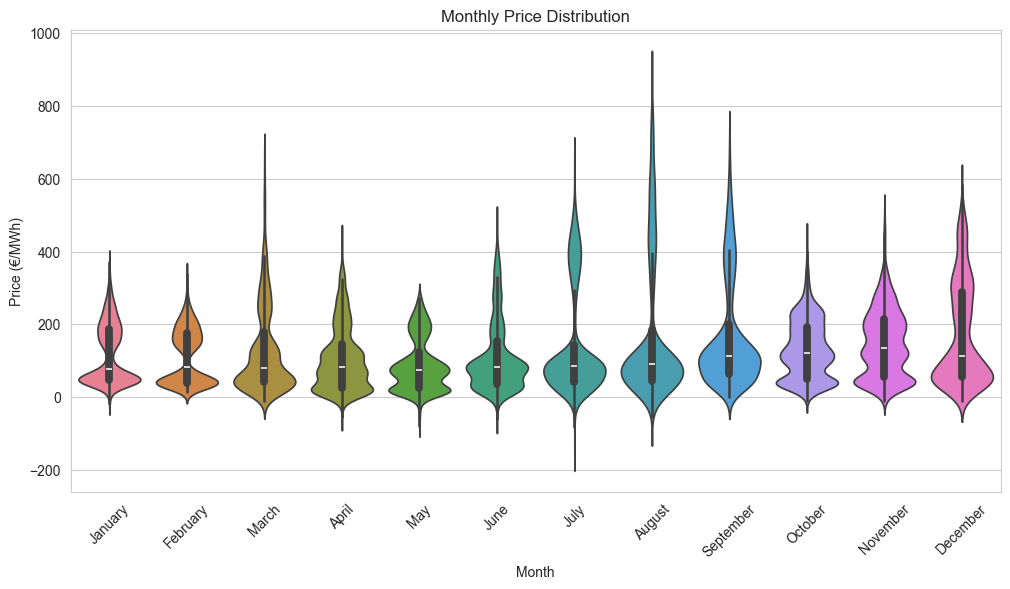

In [14]:
# Conversion des chiffres des mois en noms des mois
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
chprix['Month_name'] = chprix['Month'].map(month_names)

# Tracer le diagramme de violon
plt.figure(figsize=(12, 6))
sns.violinplot(data=chprix, x="Month_name", y="price", hue='Month_name',legend=False)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Price (€/MWh)")
plt.title("Monthly Price Distribution")
plt.show()

### Commentaire sur le Graphique

Le graphique montre une répartition des prix mensuels (en €/MWh) à l'aide de violon plots. Voici quelques observations clés :

1. **Variabilité des Prix** :
    - On observe une grande variabilité des prix d'un mois à l'autre.
    - Les mois de décembre, juillet et août semblent avoir des pics plus élevés comparativement aux autres mois.
    - Certains mois, comme avril et juin, montrent des distributions plus serrées, indiquant une stabilité relative des prix.

2. **Saisonnalité** :
    - Les variations des prix montrent un certain niveau de saisonnalité.
    - Par exemple, les mois d'été (juillet et août) montrent une variabilité plus élevée, ce qui pourrait être dû à une demande accrue pour le refroidissement.
    - En hiver, décembre montre également une variabilité plus élevée, probablement en raison d'une demande accrue pour le chauffage.

### Impact des Variabilités sur la Modélisation des Prix

Les variabilités observées dans les prix peuvent avoir plusieurs impacts sur la modélisation des prix :

1. **Saisonnalité** :
    - Il est crucial d'incorporer la saisonnalité dans les modèles de prédiction des prix. Ignorer cette composante pourrait conduire à des prédictions imprécises.
    - La saisonnalité peut être capturée en utilisant des variables explicatives telles que les mois de l'année ou en utilisant des transformations sinusoïdales des mois (comme des fonctions sinusoïdales ou cosinus).

2. **Volatilité** :
    - Les périodes de haute volatilité (comme en été et en hiver) peuvent rendre les prédictions plus difficiles.
    - Les modèles doivent être robustes face à ces variations, peut-être en utilisant des techniques de lissage ou en intégrant des variables économiques ou climatiques additionnelles.

### Prendre en Compte la Sinusoïde du Mois

Utiliser une transformation sinusoïdale des mois peut être efficace pour capturer la saisonnalité dans les données. Voici pourquoi :

1. **Continuité** :
    - Les transformations sinusoïdales (comme \( \sin(2\pi \times \text{month}/12) \) et \( \cos(2\pi \times \text{month}/12) \)) traitent les mois de manière cyclique, assurant une continuité entre décembre et janvier.

2. **Réduction de la Dimensionalité** :
    - Plutôt que d'utiliser 12 variables binaires pour représenter les mois, deux variables (sinus et cosinus) peuvent être utilisées, simplifiant le modèle tout en capturant la saisonnalité.

3. **Modélisation de la Saison** :
    - Ces transformations permettent de modéliser des phénomènes périodiques, ce qui est souvent approprié pour des données influencées par des cycles saisonniers.


### Conclusion

Incorporer des éléments de saisonnalité, comme les transformations sinusoïdales des mois, peut grandement améliorer la précision des modèles de prédiction des prix en tenant compte des variations cycliques naturelles dans les données. Ces approches permettent de mieux capturer les tendances saisonnières et de faire des prédictions plus robustes et fiables.

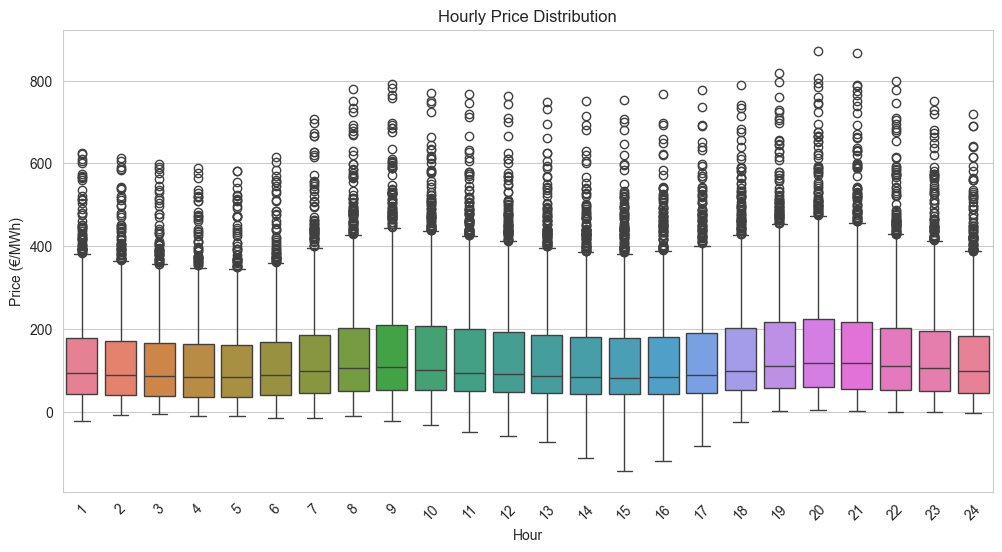

In [15]:
# Tracer le diagramme de violon
plt.figure(figsize=(12, 6))
sns.boxplot(data=chprix, x="Hour", y="price",palette='husl', hue='Hour',legend=False)
plt.xticks(rotation=45)
plt.xlabel("Hour")
plt.ylabel("Price (€/MWh)")
plt.title("Hourly Price Distribution")
plt.show()

### Commentaire sur les Boxplots

Le graphique des boxplots montre la distribution des prix horaires de l'électricité. Voici quelques points clés à commenter :

1. **Distribution Générale des Prix** :
    - Les boxplots indiquent la médiane, le premier quartile (Q1), le troisième quartile (Q3), et les valeurs aberrantes (outliers).
    - La médiane des prix augmente progressivement de minuit (heure 1) jusqu'à atteindre un pic autour de 18h à 20h, puis diminue légèrement.

2. **Dispersion et Écart Interquartile** :
    - L'écart interquartile (la hauteur de la boîte) est relativement constant durant la journée, indiquant une dispersion similaire des prix entre les différents quartiles.
    - Les prix semblent plus dispersés (écart interquartile plus grand) durant les heures de pointe (16h à 20h), ce qui suggère une plus grande variabilité des prix durant ces périodes.

3. **Valeurs Aberrantes (Outliers)** :
    - Les valeurs aberrantes sont présentes tout au long de la journée, mais leur nombre et leur éloignement par rapport à la boîte augmentent significativement durant les heures de pointe (16h à 20h).
    - Les outliers indiquent des prix exceptionnellement élevés, probablement dus à des pics de demande ou à des événements inattendus.

4. **Tendances Horaires** :
    - La tendance générale montre une augmentation des prix à partir du matin (vers 6h), culminant en fin d'après-midi et en début de soirée (18h à 20h), suivie d'une légère baisse.
    - Ces tendances peuvent être dues aux schémas typiques de consommation d'électricité, où la demande augmente le matin, reste élevée durant la journée de travail, et atteint son maximum en soirée lorsque les gens rentrent chez eux.

### Impact sur la Modélisation des Prix

Les variabilités horaires et la présence de valeurs aberrantes peuvent affecter la modélisation des prix de plusieurs manières :

1. **Saisonnalité Horaire** :
    - La saisonnalité horaire doit être capturée dans les modèles pour améliorer la précision des prédictions. Cela peut être fait en utilisant les heures comme variables explicatives.

2. **Volatilité** :
    - La présence de valeurs aberrantes et la variabilité accrue durant les heures de pointe nécessitent des modèles robustes. Des techniques comme la régularisation, l'utilisation de modèles robustes aux outliers, ou l'intégration de variables explicatives supplémentaires (comme la température ou les événements spéciaux) peuvent aider à améliorer la robustesse des modèles.

3. **Fonctions Sinusoïdales** :
    - Utiliser des transformations sinusoïdales des heures peut aider à capturer la cyclicité des données et améliorer la performance des modèles en représentant la nature périodique de la demande.

### Conclusion

Les boxplots montrent clairement les tendances horaires et la variabilité des prix de l'électricité. Comprendre et intégrer ces schémas dans les modèles prédictifs est crucial pour obtenir des prédictions précises et robustes. Les techniques comme l'utilisation des heures, des transformations sinusoïdales, et des modèles robustes peuvent aider à capturer ces variations de manière efficace.

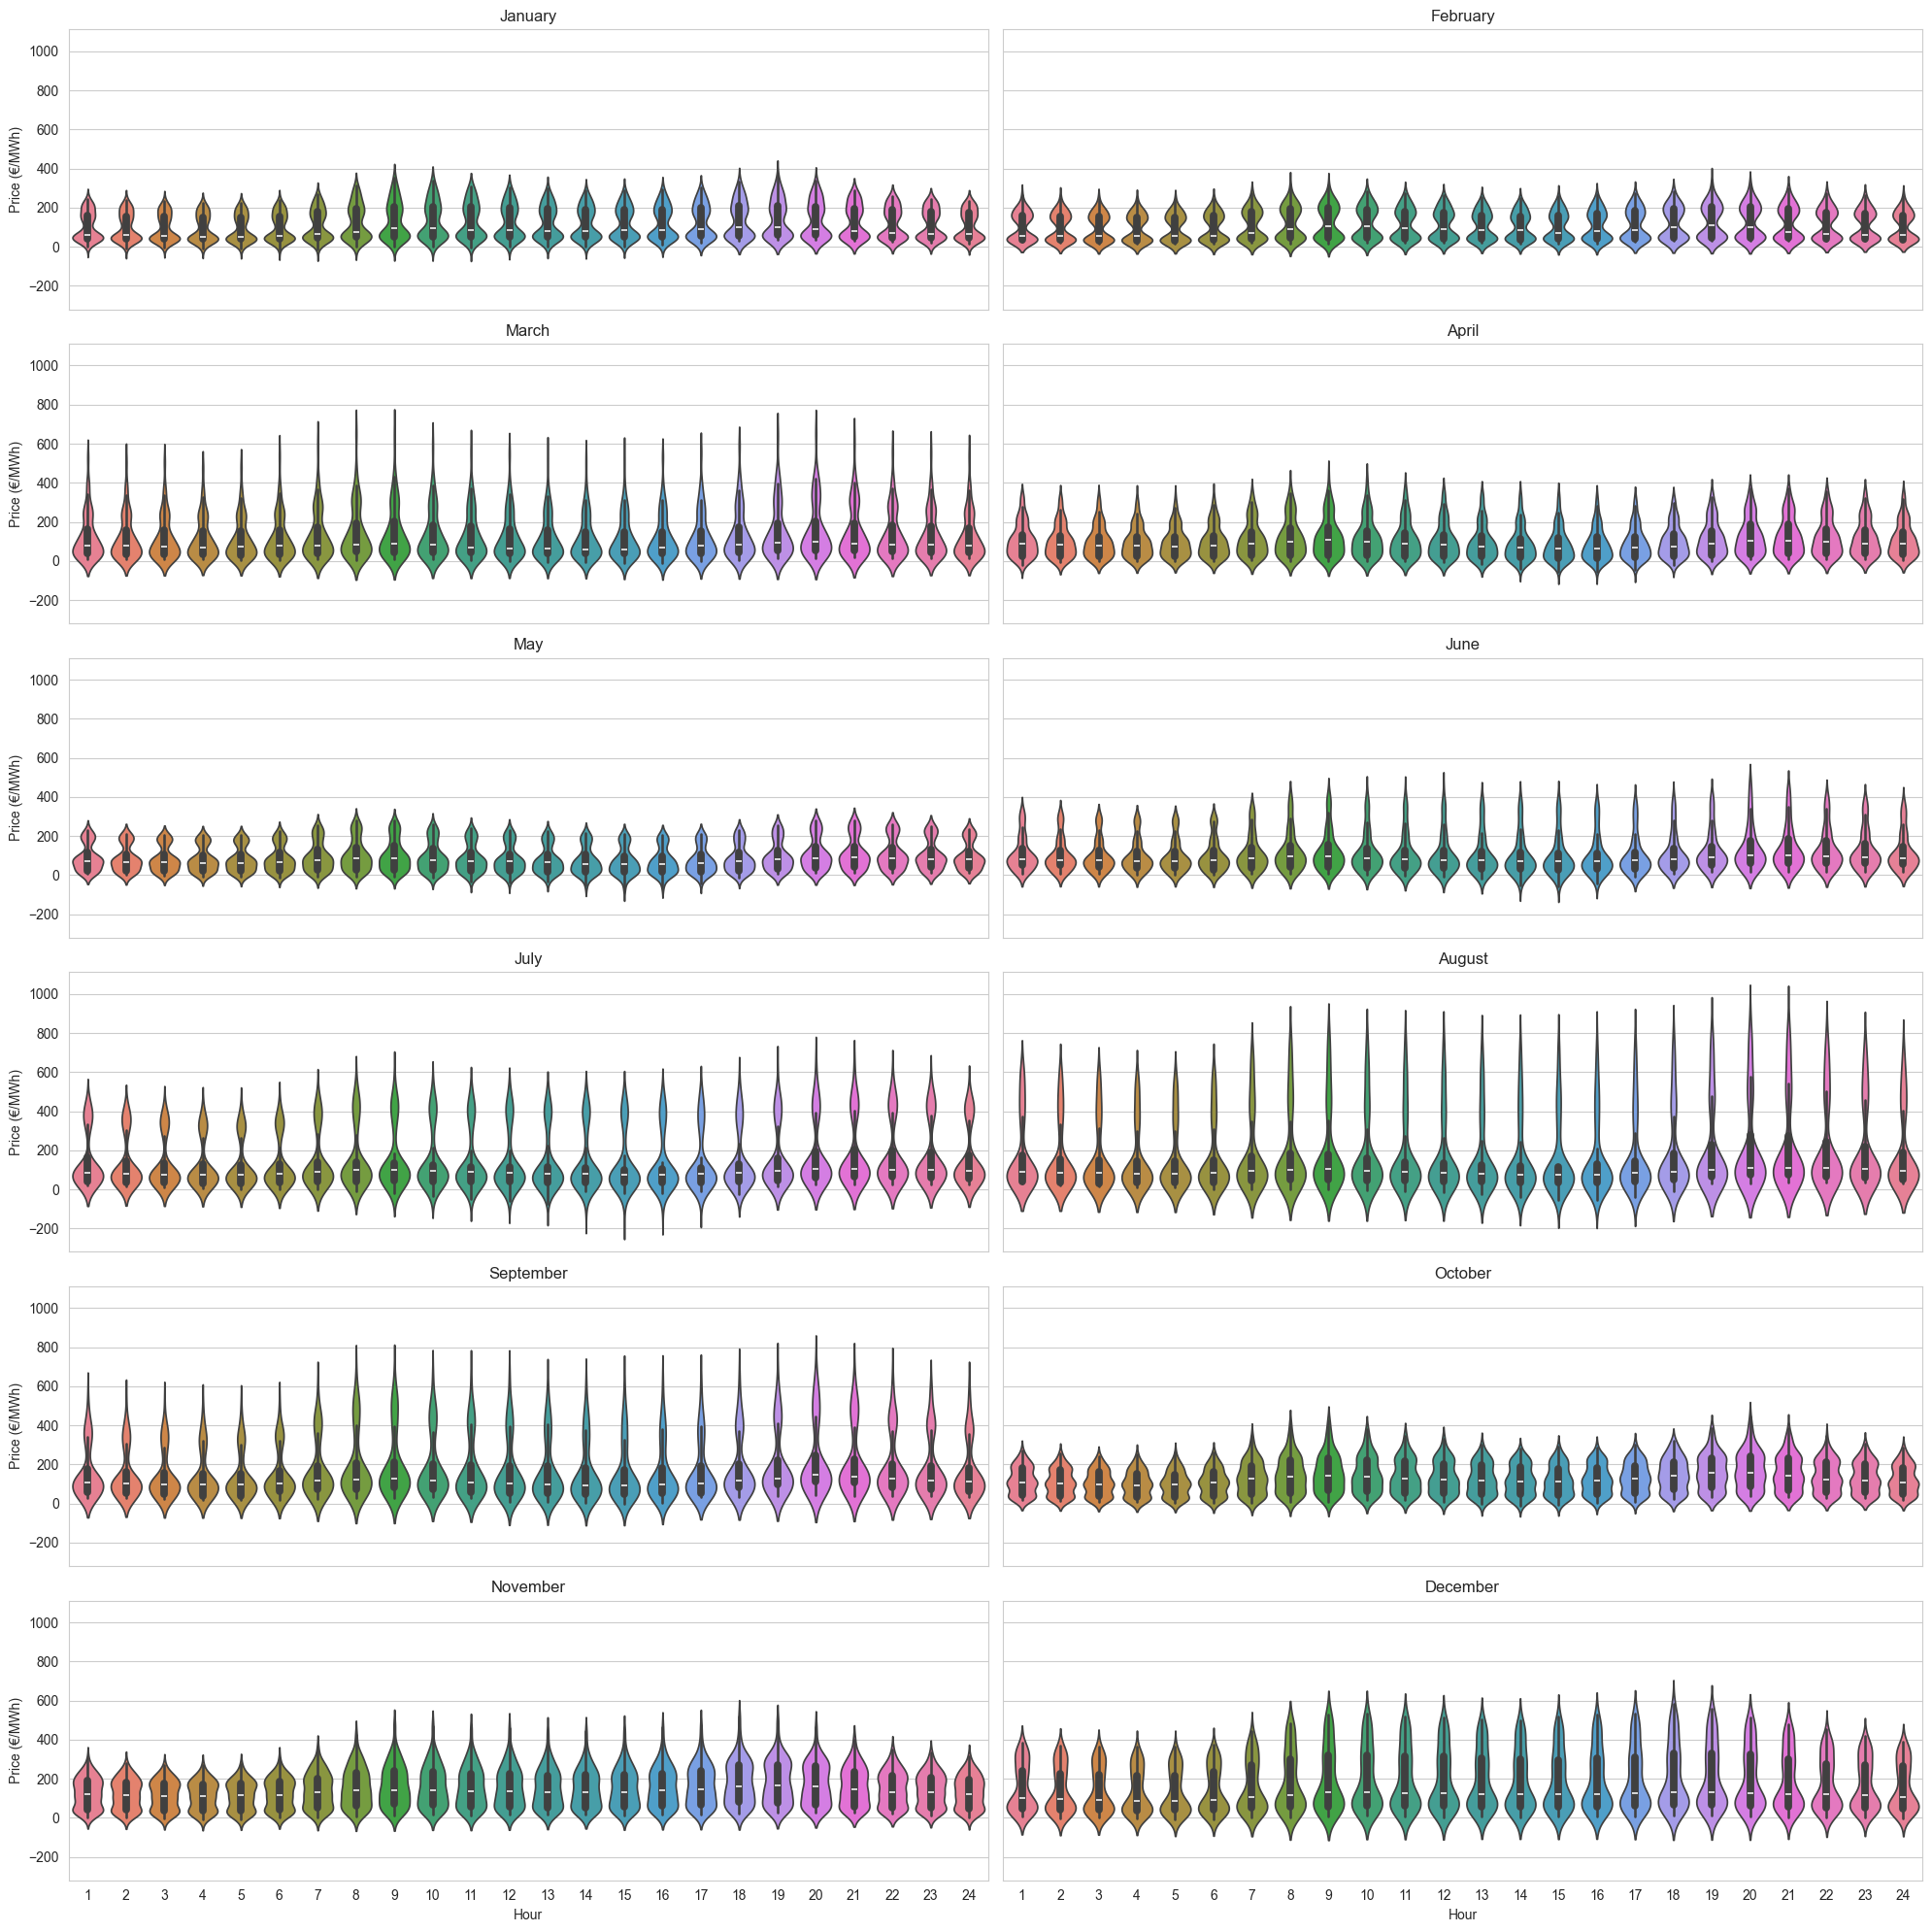

In [16]:
# Tracer des graphiques de densité séparés pour chaque mois
fig, axs = plt.subplots(6, 2, figsize=(20, 20), sharex=True, sharey=True)
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in enumerate(axs.flatten()):
    sns.violinplot(data=chprix[chprix['Month_name'] == months[i]], x="Hour", y="price", palette="husl",hue='Hour', ax=ax,legend=False)
    ax.set_title(months[i])
    ax.set_xlabel('Hour')
    ax.set_ylabel('Price (€/MWh)')

plt.tight_layout()
plt.show()

### Commentaire sur les Diagrammes de Violon des Prix Horaires par Mois

Les diagrammes de violon fournis montrent la distribution des prix horaires de l'électricité pour chaque mois de l'année. Voici quelques observations et commentaires clés :

1. **Variabilité des Prix Horaires** :
    - Chaque diagramme de violon illustre la distribution des prix pour chaque heure de la journée.
    - Les mois de juillet et d'août montrent une variabilité plus élevée des prix, particulièrement en fin de journée. Cela pourrait être dû à une demande accrue en période estivale pour le refroidissement.

2. **Tendances Saisonnales** :
    - En hiver (décembre, janvier, février), les prix montrent une tendance à augmenter en fin de journée, probablement en raison d'une demande accrue pour le chauffage et l'éclairage.
    - Les prix sont relativement plus bas et moins variables durant les heures de la nuit et du matin (1h à 6h) pour la plupart des mois, ce qui est cohérent avec une baisse de la demande.

3. **Valeurs Aberrantes (Outliers)** :
    - Les valeurs aberrantes sont présentes dans presque tous les mois, surtout en fin de journée. Elles indiquent des périodes de prix exceptionnellement élevés, possiblement causées par des pics de demande ou des conditions spécifiques du marché.

4. **Différences Mensuelles** :
    - Chaque mois présente une distribution distincte des prix horaires, reflétant des schémas saisonniers et des variations de la demande.
    - Par exemple, août montre une distribution étendue des prix avec plusieurs pics élevés, alors que mai a une distribution plus homogène avec moins de variabilité.



### Conclusion

Les diagrammes de violon fournissent une vue d'ensemble claire des distributions des prix horaires pour chaque mois. Ils révèlent des schémas saisonniers et des variations significatives qui doivent être capturés dans les modèles de prédiction des prix pour obtenir des résultats précis et robustes. Ces insights peuvent guider la sélection de fonctionnalités et la conception des modèles dans le contexte de la modélisation des prix de l'électricité.

In [17]:
chprix.drop(['Month_name','Moving_Avg'], axis=1, inplace=True)


In [18]:
chprix

,price,Quarter,Month,Hour
date,,,,
2020-01-01 00:00:00,35.42,1,1,1
2020-01-01 01:00:00,34.04,1,1,2
2020-01-01 02:00:00,31.52,1,1,3
2020-01-01 03:00:00,28.29,1,1,4
2020-01-01 04:00:00,26.92,1,1,5
...,...,...,...,...
2023-12-31 19:00:00,23.40,4,12,20
2023-12-31 20:00:00,20.65,4,12,21
2023-12-31 21:00:00,9.58,4,12,22


In [19]:
#données de température
temperature=pd.read_csv('data/temperature/temp.csv',index_col=0)
temperature.index=pd.to_datetime(temperature.index)

In [20]:
temperature

,average_temperature
date,
2020-01-01 00:00:00,278.019598
2020-01-01 01:00:00,277.955716
2020-01-01 02:00:00,277.774103
2020-01-01 03:00:00,277.714403
2020-01-01 04:00:00,277.680769
...,...
2023-12-31 19:00:00,278.109648
2023-12-31 20:00:00,277.766974
2023-12-31 21:00:00,277.584012


In [21]:
#données actual load 
actualload=pd.read_csv('data/Actual Load/Actual_Load.csv',index_col=0)
actualload.index=pd.to_datetime(actualload.index)

In [22]:
actualload

,Actual Total Load
date,
2020-01-01 00:00:00,22963.0
2020-01-01 01:00:00,22162.0
2020-01-01 02:00:00,20891.0
2020-01-01 03:00:00,19708.0
2020-01-01 04:00:00,18960.0
...,...
2023-12-31 19:00:00,116440.0
2023-12-31 20:00:00,115320.0
2023-12-31 21:00:00,111396.0


In [23]:
#données de production
prod_ch=pd.read_csv('data/production_CH.csv',index_col=0)
prod_ch.index=pd.to_datetime(prod_ch.index)
prod_ch=prod_ch.loc['2020-01-01 00:00:00':]

In [24]:
colstokeep=[ 'Hydro_Pumped_Storage_CH',
       'Hydro_Run-of-river_and_poundage_CH', 'Hydro_Water_Reservoir_CH',
        'Nuclear_CH', 'Solar_CH', 'Wind_Onshore_CH']

prod_ch=prod_ch[colstokeep]


In [25]:
prod_ch

,Hydro_Pumped_Storage_CH,Hydro_Run-of-river_and_poundage_CH,Hydro_Water_Reservoir_CH,Nuclear_CH,Solar_CH,Wind_Onshore_CH
2020-01-01 00:00:00,178.899985,170.249997,667.579995,2713.199959,0.023271,22.711422
2020-01-01 01:00:00,180.250001,176.230020,689.400096,2712.800377,0.020724,19.135443
2020-01-01 02:00:00,80.679997,169.679977,642.129993,2710.999895,0.024370,18.328175
2020-01-01 03:00:00,96.830000,167.630003,595.549952,2718.100039,0.021479,12.125551
2020-01-01 04:00:00,96.930002,189.980003,601.399993,2725.000007,0.027730,12.115996
...,...,...,...,...,...,...
2022-12-31 19:00:00,349.179992,219.130011,133.500003,2999.899936,0.293561,51.756706
2022-12-31 20:00:00,47.380006,212.830012,126.650005,3001.100067,0.233298,56.297081
2022-12-31 21:00:00,26.399999,210.979982,160.099997,3003.299942,0.184694,54.254985
2022-12-31 22:00:00,25.799997,219.279984,110.349989,3004.299983,0.176633,49.216831


In [26]:
prod2023=pd.read_csv('data/prod2023ch.csv')


In [27]:
columns_to_keep = prod2023.columns[~prod2023.isin(['n/e']).any()]
prod2023 = prod2023[columns_to_keep]

#colonne des dates
prod2023['date']=prod2023['MTU'].apply(extract_first_part)
prod2023.set_index('date',inplace=True)
prod2023.index=pd.to_datetime(prod2023.index,dayfirst=True)

#suppression des colonnes inutiles
prod2023.drop(columns=['MTU','Area','Hydro Pumped Storage  - Actual Consumption [MW]'], axis=1, inplace=True)

#renommer les colonnes 
prod2023.rename(columns={'Hydro Pumped Storage  - Actual Aggregated [MW]':'Hydro_Pumped_Storage_CH',
                         'Hydro Run-of-river and poundage  - Actual Aggregated [MW]':'Hydro_Run-of-river_and_poundage_CH',
                         'Hydro Water Reservoir  - Actual Aggregated [MW]' : 'Hydro_Water_Reservoir_CH',
                         'Nuclear  - Actual Aggregated [MW]' : 'Nuclear_CH',
                         'Solar  - Actual Aggregated [MW]': 'Solar_CH',
                         'Wind Onshore  - Actual Aggregated [MW]':'Wind_Onshore_CH'}, inplace=True)
prod2023=prod2023[~prod2023.index.duplicated()]

In [28]:
prod2023.index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=8760, freq=None)

In [29]:
# Indices cibles
target_date = '2023-03-26 02:00:00'
previous_date = '2023-03-25 02:00:00'
prod2023.loc[target_date] = prod2023.loc[target_date].fillna(prod2023.loc[previous_date])

In [30]:
prod2023.isna().sum()

Hydro_Pumped_Storage_CH               0
Hydro_Run-of-river_and_poundage_CH    0
Hydro_Water_Reservoir_CH              0
Nuclear_CH                            0
Solar_CH                              0
Wind_Onshore_CH                       0
dtype: int64

In [31]:
prod=pd.concat([prod_ch,prod2023],axis=0)

In [32]:
prod

,Hydro_Pumped_Storage_CH,Hydro_Run-of-river_and_poundage_CH,Hydro_Water_Reservoir_CH,Nuclear_CH,Solar_CH,Wind_Onshore_CH
2020-01-01 00:00:00,178.899985,170.249997,667.579995,2713.199959,0.023271,22.711422
2020-01-01 01:00:00,180.250001,176.230020,689.400096,2712.800377,0.020724,19.135443
2020-01-01 02:00:00,80.679997,169.679977,642.129993,2710.999895,0.024370,18.328175
2020-01-01 03:00:00,96.830000,167.630003,595.549952,2718.100039,0.021479,12.125551
2020-01-01 04:00:00,96.930002,189.980003,601.399993,2725.000007,0.027730,12.115996
...,...,...,...,...,...,...
2023-12-31 19:00:00,302.000000,223.000000,273.000000,3022.000000,0.000000,30.000000
2023-12-31 20:00:00,83.000000,221.000000,265.000000,3022.000000,0.000000,33.000000
2023-12-31 21:00:00,61.000000,219.000000,170.000000,3023.000000,0.000000,33.000000
2023-12-31 22:00:00,91.000000,219.000000,210.000000,3024.000000,0.000000,44.000000


In [33]:
#nuc_fr
prod_fr=pd.read_csv('data/production_FR.csv',index_col=0)
prod_fr.index=pd.to_datetime(prod_fr.index)

In [34]:
nuclear_fr=prod_fr['Nuclear_FR'].loc['2020-01-01 00:00:00':]

In [35]:
nuclear_fr

2020-01-01 00:00:00    49461.999885
2020-01-01 01:00:00    49565.002321
2020-01-01 02:00:00    49580.001000
2020-01-01 03:00:00    49270.997653
2020-01-01 04:00:00    49437.999743
                           ...     
2022-12-31 19:00:00    26498.000505
2022-12-31 20:00:00    26428.000440
2022-12-31 21:00:00    25791.001392
2022-12-31 22:00:00    25617.000876
2022-12-31 23:00:00    25779.001095
Name: Nuclear_FR, Length: 26304, dtype: float64

In [36]:
prodfr2023=pd.read_csv('data/prodfr2023.csv')


In [37]:

prodfr2023 = prodfr2023[['MTU','Nuclear  - Actual Aggregated [MW]']]

#colonne des dates
prodfr2023['date']=prodfr2023['MTU'].apply(extract_first_part)
prodfr2023.set_index('date',inplace=True)
prodfr2023.index=pd.to_datetime(prodfr2023.index,dayfirst=True)

prodfr2023.drop(columns=['MTU'], axis=1, inplace=True)


prodfr2023.rename(columns={'Nuclear  - Actual Aggregated [MW]' : 'Nuclear_FR'}, inplace=True)
prodfr2023=prodfr2023[~prodfr2023.index.duplicated()]

In [38]:
prodfr2023

,Nuclear_FR
date,
2023-01-01 00:00:00,25779.0
2023-01-01 01:00:00,25620.0
2023-01-01 02:00:00,25066.0
2023-01-01 03:00:00,24502.0
2023-01-01 04:00:00,24423.0
...,...
2023-12-31 19:00:00,42791.0
2023-12-31 20:00:00,42606.0
2023-12-31 21:00:00,41141.0


In [39]:
nuclear_fr=pd.concat([nuclear_fr,prodfr2023],axis=0)

In [40]:
nuclear_fr

,Nuclear_FR
2020-01-01 00:00:00,49461.999885
2020-01-01 01:00:00,49565.002321
2020-01-01 02:00:00,49580.001000
2020-01-01 03:00:00,49270.997653
2020-01-01 04:00:00,49437.999743
...,...
2023-12-31 19:00:00,42791.000000
2023-12-31 20:00:00,42606.000000
2023-12-31 21:00:00,41141.000000
2023-12-31 22:00:00,40725.000000


In [41]:
prod_de=pd.read_csv('data/production_DE.csv',index_col=0)

In [42]:
prod_de=prod_de.loc['2020-01-01 00:00:00':]

In [43]:
colstokeep=['Fossil_Brown_coal/Lignite_DE', 'Fossil_Gas_DE', 'Fossil_Hard_coal_DE']
prod_de = prod_de[colstokeep]
prod_de.index=pd.to_datetime(prod_de.index)

In [44]:
prodde2023=pd.read_csv('data/prodde2023.csv')

In [45]:
columns_to_keep = [ 'MTU','Fossil Brown coal/Lignite  - Actual Aggregated [MW]','Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]']
prodde2023 = prodde2023.loc[:, columns_to_keep]

#colonne des dates
prodde2023['date']=prodde2023['MTU'].apply(extract_first_part)
prodde2023.set_index('date',inplace=True)
prodde2023.index=pd.to_datetime(prodde2023.index,dayfirst=True)

#suppression des colonnes inutiles
prodde2023.drop(columns=['MTU'], axis=1, inplace=True)

#renommer les colonnes 
prodde2023.rename(columns={'Fossil Brown coal/Lignite  - Actual Aggregated [MW]': 'Fossil_Brown_coal/Lignite_DE',
                           'Fossil Gas  - Actual Aggregated [MW]' :  'Fossil_Gas_DE',
                           'Fossil Hard coal  - Actual Aggregated [MW]' : 'Fossil_Hard_coal_DE' }, inplace=True)
prodde2023=prodde2023[~prodde2023.index.duplicated()]
prodde2023=prodde2023.resample('h').sum()

In [46]:
prodde2023

,Fossil_Brown_coal/Lignite_DE,Fossil_Gas_DE,Fossil_Hard_coal_DE
date,,,
2023-01-01 00:00:00,15437.0,6891.0,8270.0
2023-01-01 01:00:00,15466.0,6273.0,8208.0
2023-01-01 02:00:00,15441.0,6287.0,8137.0
2023-01-01 03:00:00,15459.0,6262.0,8148.0
2023-01-01 04:00:00,15364.0,6205.0,8161.0
...,...,...,...
2023-12-31 19:00:00,13626.0,11322.0,8451.0
2023-12-31 20:00:00,13475.0,10962.0,7550.0
2023-12-31 21:00:00,13497.0,10772.0,7742.0


In [47]:
prod_de=pd.concat([prod_de,prodde2023],axis=0)

In [48]:
prod_de

,Fossil_Brown_coal/Lignite_DE,Fossil_Gas_DE,Fossil_Hard_coal_DE
2020-01-01 00:00:00,9419.067309,4542.232492,1825.302382
2020-01-01 01:00:00,9425.601927,4368.769740,1797.244808
2020-01-01 02:00:00,9497.335976,4388.420252,1899.287818
2020-01-01 03:00:00,9549.856831,4292.624772,1922.802348
2020-01-01 04:00:00,9466.532809,4356.380451,1983.435093
...,...,...,...
2023-12-31 19:00:00,13626.000000,11322.000000,8451.000000
2023-12-31 20:00:00,13475.000000,10962.000000,7550.000000
2023-12-31 21:00:00,13497.000000,10772.000000,7742.000000
2023-12-31 22:00:00,13500.000000,10592.000000,7611.000000


In [49]:
import os
#données d export et d import swiss grid
sgpath='data/swissgrid'
sgpaths=[os.path.join(sgpath,f) for f in os.listdir(sgpath)]

sgpaths

['data/swissgrid\\2020.xlsx',
 'data/swissgrid\\2021.xlsx',
 'data/swissgrid\\2022.xlsx',
 'data/swissgrid\\2023.xlsx']

In [50]:
sgdata=[]
for f in sgpaths:
    df=pd.read_excel(f,sheet_name='Zeitreihen0h15',index_col=0,skiprows=[1])
    sgdata.append(df)

sgdata=pd.concat(sgdata,axis=0)
    
    


In [51]:
sgdata.isna().sum()

Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock    0
Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock                         0
Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock                        0
Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid                   0
Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid                         0
                                                                                                                ..
Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH                                                             0
Produktion Kantonsübergreifend\nProduction across Cantons                                                        0
Verbrauch Kantonsübergreifend\nConsumption across Cantons                       

In [52]:

sgdata=sgdata[['Verbundaustausch CH->DE\nCross Border Exchange CH->DE',
       'Verbundaustausch DE->CH\nCross Border Exchange DE->CH',
       'Verbundaustausch CH->FR\nCross Border Exchange CH->FR',
       'Verbundaustausch FR->CH\nCross Border Exchange FR->CH'
       ]]
sgdata.index=pd.to_datetime(sgdata.index,dayfirst=True)
sgdata.rename(columns={'Verbundaustausch CH->DE\nCross Border Exchange CH->DE':'CH->DE',
                       'Verbundaustausch DE->CH\nCross Border Exchange DE->CH':'DE->CH',
                        'Verbundaustausch CH->FR\nCross Border Exchange CH->FR' : 'CH->FR',
                        'Verbundaustausch FR->CH\nCross Border Exchange FR->CH':'FR->CH',},inplace=True)
sgdata=sgdata.resample('h').sum()/100

sgdata=sgdata.loc[sgdata.index.year<=2023]

In [53]:
sgdata

,CH->DE,DE->CH,CH->FR,FR->CH
2020-01-01 00:00:00,289.00,14440.01,3434.1425,4970.7175
2020-01-01 01:00:00,712.18,15732.59,3508.9375,8031.8975
2020-01-01 02:00:00,1114.71,14817.36,4297.4450,7543.5775
2020-01-01 03:00:00,1189.62,15688.56,4409.0175,8822.7425
2020-01-01 04:00:00,1641.12,14393.80,4812.7525,9865.9675
...,...,...,...,...
2023-12-31 19:00:00,9807.48,13159.12,308.3400,23732.9200
2023-12-31 20:00:00,7640.48,15124.96,408.5000,23734.4900
2023-12-31 21:00:00,5863.20,16971.96,552.8500,23062.6800
2023-12-31 22:00:00,3220.72,20439.03,614.2300,22046.1500


In [54]:

final_data=pd.concat([chprix,prod,actualload,sgdata,prod_de,nuclear_fr,temperature],axis=1)

In [55]:
import numpy as np
final_data['Day of the Week'] = final_data.index.dayofweek + 1
final_data['is_weekend'] = final_data['Day of the Week'].apply(lambda x: 1 if x >= 6 else 0)
final_data['day_of_week_sin'] = np.sin(2 * np.pi * final_data['Day of the Week'] / 7)
final_data['day_of_week_cos'] = np.cos(2 * np.pi * final_data['Day of the Week'] / 7)
final_data['month_of_year_sin'] = np.sin(2 * np.pi * final_data['Month'] / 12)
final_data['month_of_year_cos'] = np.cos(2 * np.pi * final_data['Month'] / 12)
final_data['hour_sin'] = np.sin(2 * np.pi * final_data['Hour'] / 24)
final_data['hour_cos'] = np.cos(2 * np.pi * final_data['Hour'] / 24)

In [56]:
final_data.columns

Index(['price', 'Quarter', 'Month', 'Hour', 'Hydro_Pumped_Storage_CH',
       'Hydro_Run-of-river_and_poundage_CH', 'Hydro_Water_Reservoir_CH',
       'Nuclear_CH', 'Solar_CH', 'Wind_Onshore_CH', 'Actual Total Load',
       'CH->DE', 'DE->CH', 'CH->FR', 'FR->CH', 'Fossil_Brown_coal/Lignite_DE',
       'Fossil_Gas_DE', 'Fossil_Hard_coal_DE', 'Nuclear_FR',
       'average_temperature', 'Day of the Week', 'is_weekend',
       'day_of_week_sin', 'day_of_week_cos', 'month_of_year_sin',
       'month_of_year_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

In [57]:
# Calcul des moyennes et écarts-types de rolling et des Z-scores 

# Fenêtre de 24 heures avant et après (total 48 heures)
mean_24h = final_data['price'].rolling(window=24).mean()
std_24h = final_data['price'].rolling(window=24).std()
final_data['zscore_24h'] = (final_data['price'] - mean_24h) / std_24h

# Fenêtre de 48 heures
mean_48h = final_data['price'].rolling(window=48).mean()
std_48h = final_data['price'].rolling(window=48).std()
final_data['zscore_48h'] = (final_data['price'] - mean_48h) / std_48h

# Fenêtre de 72 heures
mean_72h = final_data['price'].rolling(window=72).mean()
std_72h = final_data['price'].rolling(window=72).std()
final_data['zscore_72h'] = (final_data['price'] - mean_72h) / std_72h

# Fenêtre d'une semaine (7 jours)
mean_7d = final_data['price'].rolling(window=7*24).mean()
std_7d = final_data['price'].rolling(window=7*24).std()
final_data['zscore_7d'] = (final_data['price'] - mean_7d) / std_7d

# Fenêtre de deux semaines (14 jours)
mean_14d = final_data['price'].rolling(window=14*24).mean()
std_14d = final_data['price'].rolling(window=14*24).std()
final_data['zscore_14d'] = (final_data['price'] - mean_14d) / std_14d




In [58]:
final_data

,price,Quarter,Month,Hour,Hydro_Pumped_Storage_CH,Hydro_Run-of-river_and_poundage_CH,Hydro_Water_Reservoir_CH,Nuclear_CH,Solar_CH,Wind_Onshore_CH,...,day_of_week_cos,month_of_year_sin,month_of_year_cos,hour_sin,hour_cos,zscore_24h,zscore_48h,zscore_72h,zscore_7d,zscore_14d
2020-01-01 00:00:00,35.42,1,1,1,178.899985,170.249997,667.579995,2713.199959,0.023271,22.711422,...,-0.900969,5.000000e-01,0.866025,2.588190e-01,0.965926,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,34.04,1,1,2,180.250001,176.230020,689.400096,2712.800377,0.020724,19.135443,...,-0.900969,5.000000e-01,0.866025,5.000000e-01,0.866025,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,31.52,1,1,3,80.679997,169.679977,642.129993,2710.999895,0.024370,18.328175,...,-0.900969,5.000000e-01,0.866025,7.071068e-01,0.707107,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,28.29,1,1,4,96.830000,167.630003,595.549952,2718.100039,0.021479,12.125551,...,-0.900969,5.000000e-01,0.866025,8.660254e-01,0.500000,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,26.92,1,1,5,96.930002,189.980003,601.399993,2725.000007,0.027730,12.115996,...,-0.900969,5.000000e-01,0.866025,9.659258e-01,0.258819,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,23.40,4,12,20,302.000000,223.000000,273.000000,3022.000000,0.000000,30.000000,...,1.000000,-2.449294e-16,1.000000,-8.660254e-01,0.500000,0.311654,-0.115397,-0.155451,-0.299924,-0.788819
2023-12-31 20:00:00,20.65,4,12,21,83.000000,221.000000,265.000000,3022.000000,0.000000,33.000000,...,1.000000,-2.449294e-16,1.000000,-7.071068e-01,0.707107,0.207888,-0.280428,-0.290817,-0.425353,-0.868016
2023-12-31 21:00:00,9.58,4,12,22,61.000000,219.000000,170.000000,3023.000000,0.000000,33.000000,...,1.000000,-2.449294e-16,1.000000,-5.000000e-01,0.866025,-0.819360,-0.939309,-0.955013,-0.912995,-1.201063
2023-12-31 22:00:00,16.78,4,12,23,91.000000,219.000000,210.000000,3024.000000,0.000000,44.000000,...,1.000000,-2.449294e-16,1.000000,-2.588190e-01,0.965926,0.078510,-0.496708,-0.478798,-0.602647,-0.973973


In [59]:
from sklearn.impute import KNNImputer
# Application de KNNImputer pour imputer les valeurs manquantes
imputer = KNNImputer(n_neighbors=5)  # Vous pouvez ajuster n_neighbors selon vos besoins
final_data[['zscore_24h','zscore_48h', 'zscore_72h', 'zscore_7d', 'zscore_14d']] = imputer.fit_transform(final_data[['zscore_24h','zscore_48h', 'zscore_72h', 'zscore_7d', 'zscore_14d']])


In [60]:
final_data.columns 

Index(['price', 'Quarter', 'Month', 'Hour', 'Hydro_Pumped_Storage_CH',
       'Hydro_Run-of-river_and_poundage_CH', 'Hydro_Water_Reservoir_CH',
       'Nuclear_CH', 'Solar_CH', 'Wind_Onshore_CH', 'Actual Total Load',
       'CH->DE', 'DE->CH', 'CH->FR', 'FR->CH', 'Fossil_Brown_coal/Lignite_DE',
       'Fossil_Gas_DE', 'Fossil_Hard_coal_DE', 'Nuclear_FR',
       'average_temperature', 'Day of the Week', 'is_weekend',
       'day_of_week_sin', 'day_of_week_cos', 'month_of_year_sin',
       'month_of_year_cos', 'hour_sin', 'hour_cos', 'zscore_24h', 'zscore_48h',
       'zscore_72h', 'zscore_7d', 'zscore_14d'],
      dtype='object')

In [61]:
final_data.to_csv('data/final_data.csv')